In [1]:
%who

Interactive namespace is empty.


In [2]:
import xarray as xr
import numpy as np
import geopandas as gpd
import datetime
import matplotlib

# getting the spatial plotting function from another directory
import sys
new_path = '/home/566/ad9701/drought_probability/final_code_AU/'
if new_path not in sys.path:
    sys.path.append(new_path)
import validation_functions as myfuncs

In [5]:
tmax_dir = '/g/data/zv2/agcd/v1/tmax/mean/r005/01month/'
tmax_files = 'agcd_v1_tmax_mean_r005_monthly_*.nc'

tmin_dir = '/g/data/zv2/agcd/v1/tmin/mean/r005/01month/'
tmin_files = 'agcd_v1_tmin_mean_r005_monthly_*.nc'

ds_tmax = xr.open_mfdataset(tmax_dir + tmax_files)
ds_tmin = xr.open_mfdataset(tmin_dir + tmin_files)

In [13]:
da_tmean = (ds_tmax['tmax'] + ds_tmin['tmin'])/2

# the monthly climatology from long-term data
clim_time_slice = slice('1981-01-01', '2020-05-31')
drght_time_slice = slice('2016-12-01', '2020-12-31')

da_lt_monClim = da_tmean.sel(time = clim_time_slice).groupby('time.month').mean('time')
da_monAnom = da_tmean.sel(time = drght_time_slice).groupby('time.month') - da_lt_monClim

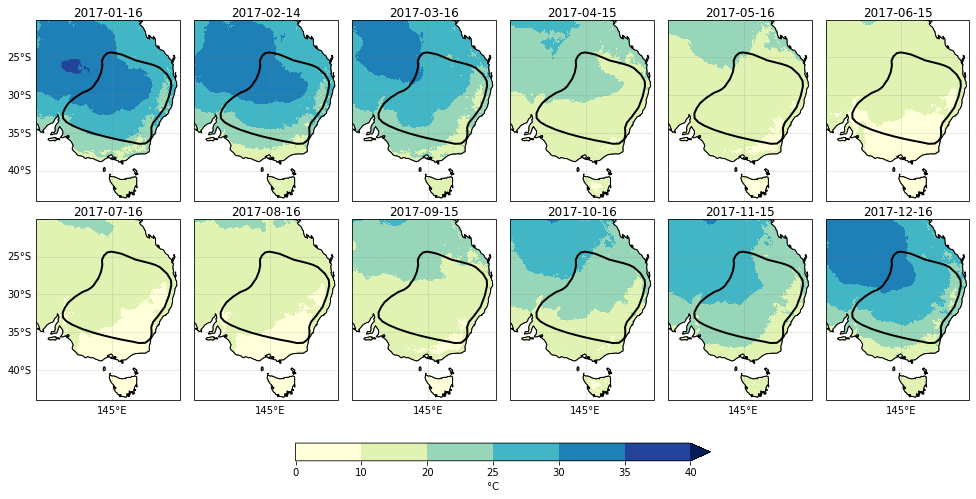

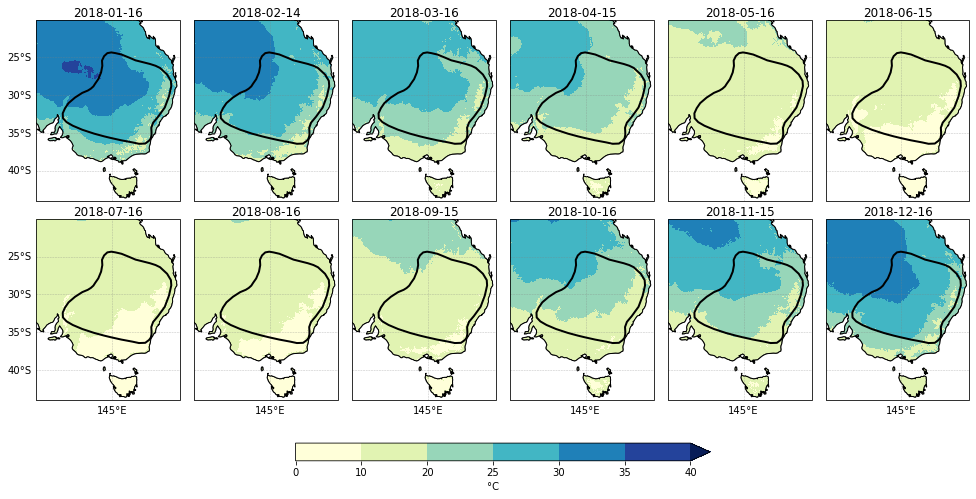

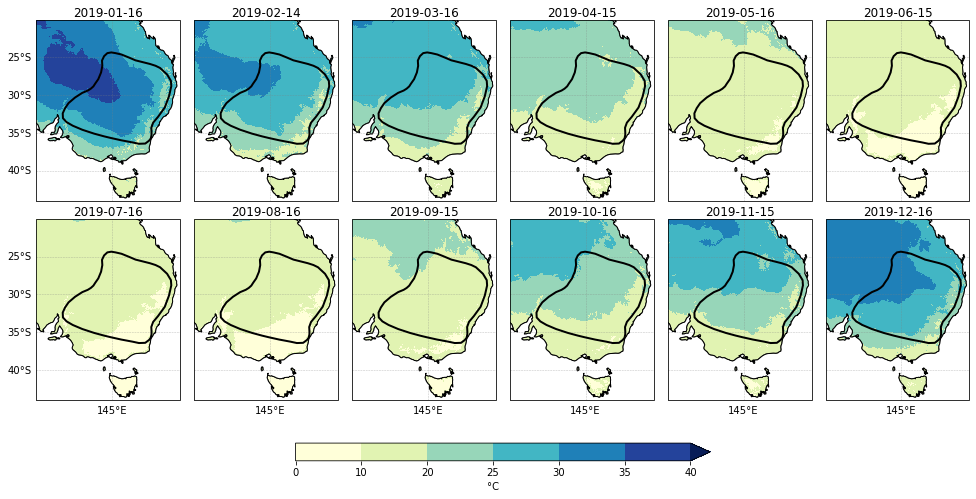

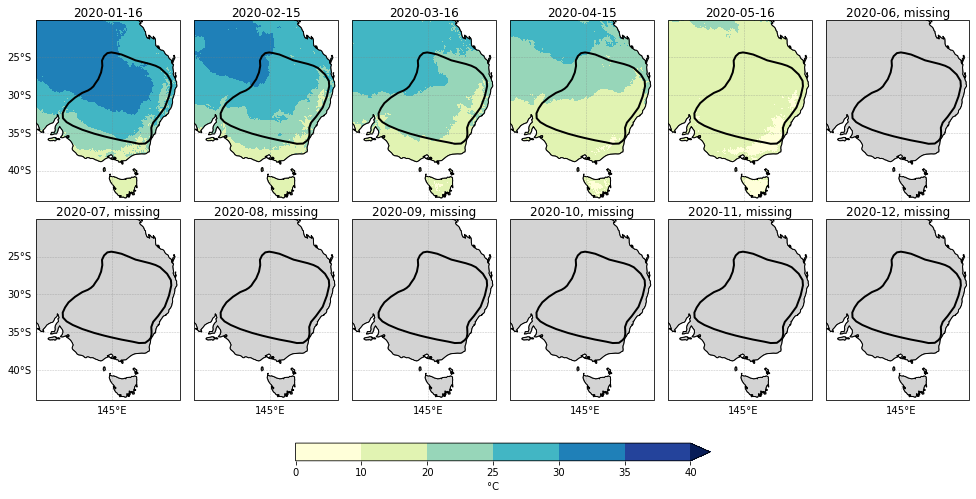

In [24]:
out_dir = 'figures/drought_2017to2020/temperature/'
figname_prefix = 'temperature_monMean'

sh_file = '/g/data/w97/ad9701/drought_2017to2020/drought_focusArea/smooth_polygon_drought_focusArea.shp'

current_cmap = matplotlib.cm.get_cmap("YlGnBu").copy()
current_cmap.set_bad(color='lightgrey')

# only the southeast
lat_slice_small = slice(-44, -20)
lon_slice_small = slice(135, 154)

da_nan = da_tmean[0,:,:].where(da_tmean[0,:,:]>1000)

for year in [2017, 2018, 2019, 2020]:
    da_year = da_tmean.sel(time = str(year), lat=lat_slice_small, lon=lon_slice_small)
    plot_list = [da_year.isel(time = i) for i in range(len(da_year.time.values))] 
    
    # find the months for which the values are missing & place an empty data array there
    mon_array = np.array(range(1, 13))
    nanInd = [x not in da_year['time.month'].values for x in mon_array]
    for i in range(len(nanInd)):
        if nanInd[i]:
            da_temp = da_nan.sel(lat=lat_slice_small, lon=lon_slice_small).assign_coords({'time':datetime.datetime(year,i+1,15)})
            plot_list.insert(i, da_temp)
    
    subplot_title = [np.datetime_as_string(x.time.values, unit='D') for x in plot_list]
    for i in range(len(nanInd)):
        if nanInd[i]:
            subplot_title[i] = np.datetime_as_string(plot_list[i].time.values, unit='M') + ', missing'

    levels = [0, 10, 20, 25, 30, 35, 40]
    out_figname = figname_prefix + '_' + str(year)
    myfuncs.draw_pcolormesh_Npanels(plot_list, cmap = current_cmap, ncols = 6, nrows = 2, panel_width=2.4, panel_height=4.1, levels=levels, 
                                    subplot_title = subplot_title, shapefile = sh_file, shapefile_color = 'black',
                                    out_dir = out_dir, out_figname = out_figname, fig_dpi = 600, cbar_label=u'\N{DEGREE SIGN}'+'C', cbar_extend='max')

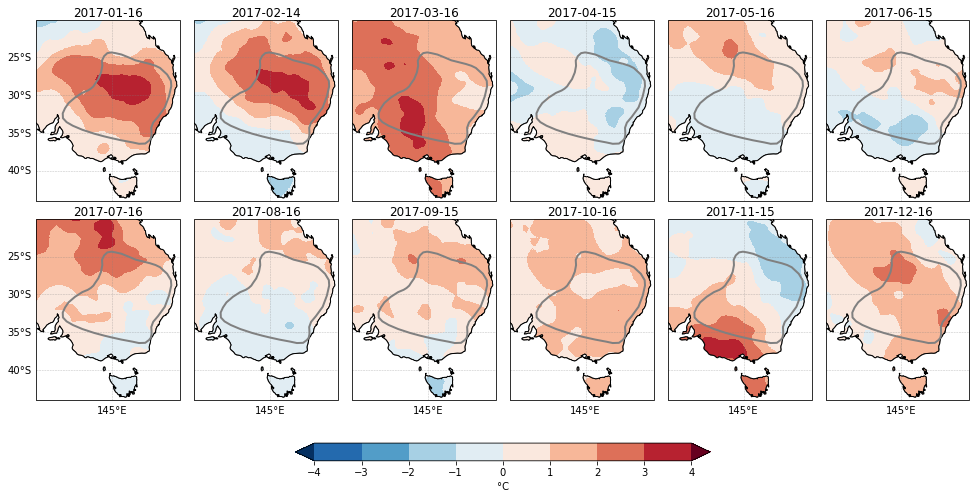

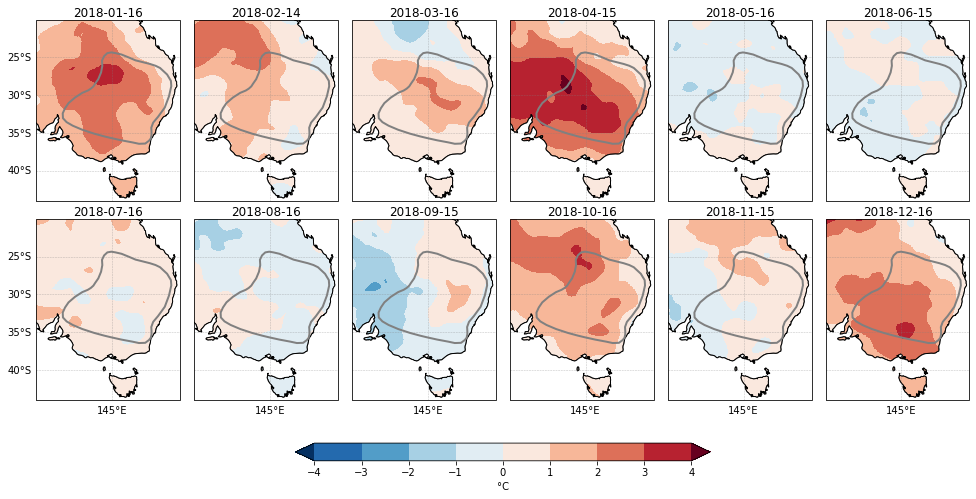

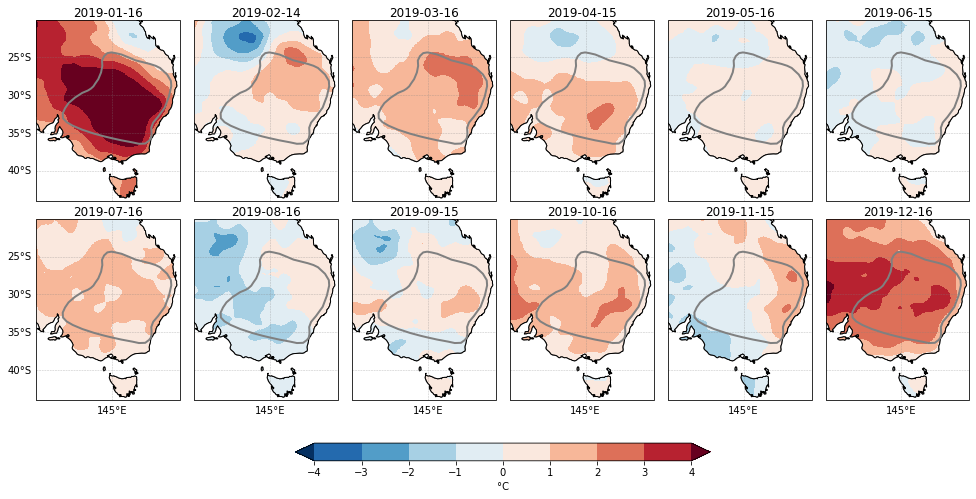

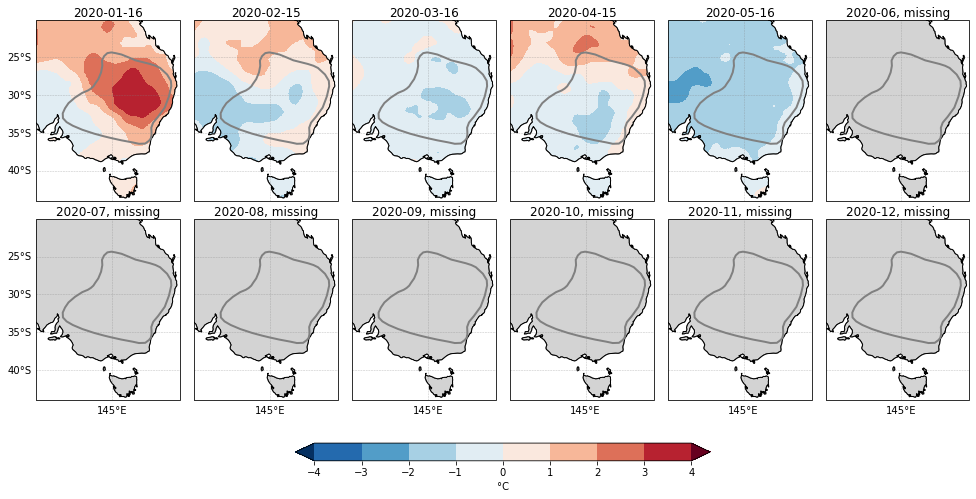

In [28]:
out_dir = 'figures/drought_2017to2020/temperature/'
figname_prefix = 'temperature_monAnom'

sh_file = '/g/data/w97/ad9701/drought_2017to2020/drought_focusArea/smooth_polygon_drought_focusArea.shp'

current_cmap = matplotlib.cm.get_cmap("RdBu_r").copy()
current_cmap.set_bad(color='lightgrey')

# only the southeast
lat_slice_small = slice(-44, -20)
lon_slice_small = slice(135, 154)

da_nan = da_tmean[0,:,:].where(da_tmean[0,:,:]>1000)

for year in [2017, 2018, 2019, 2020]:
    da_year = da_monAnom.sel(time = str(year), lat=lat_slice_small, lon=lon_slice_small)
    plot_list = [da_year.isel(time = i) for i in range(len(da_year.time.values))] 
    
    # find the months for which the values are missing & place an empty data array there
    mon_array = np.array(range(1, 13))
    nanInd = [x not in da_year['time.month'].values for x in mon_array]
    for i in range(len(nanInd)):
        if nanInd[i]:
            da_temp = da_nan.sel(lat=lat_slice_small, lon=lon_slice_small).assign_coords({'time':datetime.datetime(year,i+1,15)})
            plot_list.insert(i, da_temp)
    
    subplot_title = [np.datetime_as_string(x.time.values, unit='D') for x in plot_list]
    for i in range(len(nanInd)):
        if nanInd[i]:
            subplot_title[i] = np.datetime_as_string(plot_list[i].time.values, unit='M') + ', missing'

    levels = [-4, -3, -2, -1, 0, 1, 2, 3, 4]
    out_figname = figname_prefix + '_' + str(year)
    myfuncs.draw_pcolormesh_Npanels(plot_list, cmap = current_cmap, ncols = 6, nrows = 2, panel_width=2.4, panel_height=4.1, levels=levels, 
                                    subplot_title = subplot_title, shapefile = sh_file, shapefile_color = 'grey',
                                    out_dir = out_dir, out_figname = out_figname, cbar_label=u'\N{DEGREE SIGN}'+'C') #, cbar_extend='max')

### Area mean

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 14

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [30]:
# get a region mask using the drought focus region shapefile
import regionmask

# read in the focus region shapefile
drought_focusReg = gpd.read_file('/g/data/w97/ad9701/drought_2017to2020/drought_focusArea/smooth_polygon_drought_focusArea.shp')

# # create a mask of the polygon for the lat-long values in ds. The mask would contain '0' inside the region; nan otherwise
# da_mask_zeros = regionmask.mask_geopandas(geodataframe = drought_focusReg, lon_or_obj = da_sm_monAnom.lon.values, lat = da_sm_monAnom.lat.values)
# # setting the points inside the region to 1
# da_mask = xr.where(da_mask_zeros == 0, 1, np.nan)

# # save the mask into a netcdf file
# out_file = '/g/data/w97/ad9701/drought_2017to2020/ESACCI_mask_drought_focusArea.nc'
# da_mask.to_netcdf(out_file)

# read mask from saved file
mask_file = '/g/data/w97/ad9701/drought_2017to2020/AGCD_mask_drought_focusArea.nc'
ds_mask = xr.open_dataset(mask_file)
da_mask = ds_mask['mask']

da_monAnom_masked = da_monAnom*da_mask
da_monAnom_regAvg = myfuncs.calc_areaAvg(da_monAnom_masked)

da_lt_monClim_masked = da_lt_monClim*da_mask
da_lt_monClim_regAvg = myfuncs.calc_areaAvg(da_lt_monClim_masked)

da_time_bymon = np.array(pd.to_datetime(da_monAnom_regAvg.time).to_period('M').to_timestamp().floor('D') + np.timedelta64(14, 'D'))
da_monAnom_regAvg = da_monAnom_regAvg.assign_coords({'time': da_time_bymon})

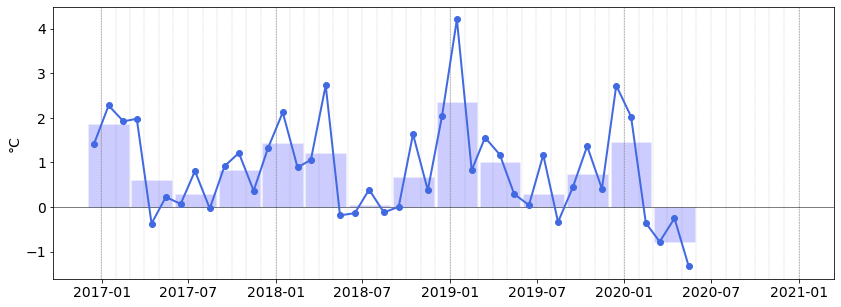

In [35]:
out_dir = 'figures/drought_2017to2020/temperature/'

fig, ax = plt.subplots(nrows=1,ncols=1,
                    figsize=(14,5)) #width, height

seas_breaks = pd.date_range('2016-12-31', freq='M', periods=12*4+1).to_numpy()#.astype(float)
year_breaks = pd.date_range('2016-12-31', freq='Y', periods=5).to_numpy()

array_time = da_monAnom_regAvg.resample(time="QS-DEC").mean().time.values.astype('datetime64[D]') + np.timedelta64(45, 'D')
array_val = da_monAnom_regAvg.resample(time="QS-DEC").mean().values
plt.bar(array_time, array_val, width=85, edgecolor='white', color='blue', alpha=0.2)

for xline in seas_breaks:
    plt.axvline(xline, color = 'grey', linestyle = '--', linewidth = 0.2)
for xline in year_breaks:
    plt.axvline(xline, color = 'grey', linestyle = '--', linewidth = 0.5)

plt.axhline(0, color = 'black', linestyle = 'solid', linewidth = 0.5)
# # plt.errorbar(da_sm_monAnom_regAvg.time.values, da_sm_monAnom_regAvg.values, yerr=da_sm_uncert_regAvg.values, fmt='o', color='royalblue',
# #              ecolor='lightsteelblue', elinewidth=3, capsize=0)
# plt.errorbar(da_sm_monAnom_regAvg.time.values, da_sm_monAnom_regAvg.values, yerr=da_sm_uncert_regAvg.values, fmt='o', color='royalblue',
#              ecolor='blue', elinewidth=2, capsize=0)
plt.plot(da_monAnom_regAvg.time.values, da_monAnom_regAvg.values, color="royalblue", marker="o", linewidth=2)


plt.xlabel('')
plt.ylabel(u'\N{DEGREE SIGN}'+'C')

fig.savefig(out_dir + 'areaAvg_temperature_anom_from_monClim_600dpi.png', bbox_inches='tight', dpi = 600)
fig.savefig(out_dir + 'areaAvg_temperature_anom_from_monClim.pdf', bbox_inches='tight', format = 'pdf')

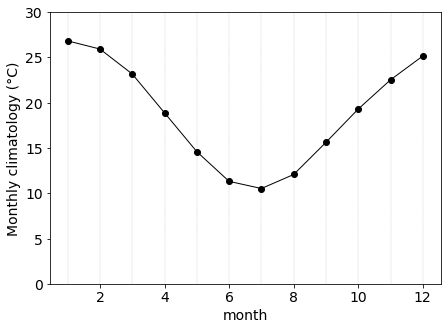

In [33]:
fig, ax = plt.subplots(nrows=1,ncols=1,
                    figsize=(7,5)) #width, height

for xline in range(1, 13):
    plt.axvline(xline, color = 'grey', linestyle = '--', linewidth = 0.2)

plt.plot(da_lt_monClim_regAvg.month.values, da_lt_monClim_regAvg.values, color="black", marker="o", linewidth=1)
plt.xlabel('month')
plt.ylabel('Monthly climatology ('+u'\N{DEGREE SIGN}'+'C'+')')
plt.ylim((0, 30))

fig.savefig(out_dir + 'AGCD_temperature_monClim.png', bbox_inches='tight', dpi = 600)
fig.savefig(out_dir + 'AGCD_temperature_monClim.pdf', bbox_inches='tight', format = 'pdf')

### Save anomalies in CSV files

In [36]:
anom_seasMean = da_monAnom_regAvg.resample(time="QS-DEC").mean()
clim_seasMean = da_lt_monClim_regAvg.sel(month = da_monAnom_regAvg['time.month'].values).rename({'month':'time'})\
.assign_coords({'time':da_monAnom_regAvg.time.values}).resample(time="QS-DEC").mean()

df_anom = pd.DataFrame({'season':anom_seasMean.time.values,
                        'anomaly (degC)': np.round(anom_seasMean, 5).values,
                       'climatology (degC)': np.round(clim_seasMean, 5).values})
print(df_anom)

out_file = '/g/data/w97/ad9701/drought_2017to2020/anomalies_csv/seas_temperature_mean_anomalies.csv'
df_anom.to_csv(out_file)

       season  anomaly (degC)  climatology (degC)
0  2016-12-01         1.86732            25.95522
1  2017-03-01         0.61020            18.86857
2  2017-06-01         0.28021            11.29702
3  2017-09-01         0.83061            19.13674
4  2017-12-01         1.44275            25.95522
5  2018-03-01         1.20008            18.86857
6  2018-06-01         0.04221            11.29702
7  2018-09-01         0.67159            19.13674
8  2018-12-01         2.36150            25.95522
9  2019-03-01         1.00732            18.86857
10 2019-06-01         0.29010            11.29702
11 2019-09-01         0.73783            19.13674
12 2019-12-01         1.46488            25.95522
13 2020-03-01        -0.79001            18.86857


In [37]:
anom_mon = da_monAnom_regAvg
clim_mon = da_lt_monClim_regAvg.sel(month = da_monAnom_regAvg['time.month'].values).rename({'month':'time'}).assign_coords({'time':da_monAnom_regAvg.time.values})

df_anom_mon = pd.DataFrame({'month':anom_mon.time.values,
                        'anomaly (degC)': np.round(anom_mon, 5).values,
                        'climatology (degC)': np.round(clim_mon, 5).values})
print(df_anom_mon)
out_file_mon = '/g/data/w97/ad9701/drought_2017to2020/anomalies_csv/mon_temperature_mean_anomalies.csv'
df_anom_mon.to_csv(out_file_mon)

        month  anomaly (degC)  climatology (degC)
0  2016-12-15         1.40407            25.14334
1  2017-01-15         2.27703            26.81157
2  2017-02-15         1.92087            25.91073
3  2017-03-15         1.97924            23.15477
4  2017-04-15        -0.37259            18.86755
5  2017-05-15         0.22395            14.58340
6  2017-06-15         0.06762            11.30804
7  2017-07-15         0.80737            10.51841
8  2017-08-15        -0.03435            12.06459
9  2017-09-15         0.91531            15.60976
10 2017-10-15         1.21306            19.28855
11 2017-11-15         0.36347            22.51191
12 2017-12-15         1.31822            25.14334
13 2018-01-15         2.12317            26.81157
14 2018-02-15         0.88686            25.91073
15 2018-03-15         1.05825            23.15477
16 2018-04-15         2.73098            18.86755
17 2018-05-15        -0.18898            14.58340
18 2018-06-15        -0.13860            11.30804
